E-commerce Sales Performance Over Time

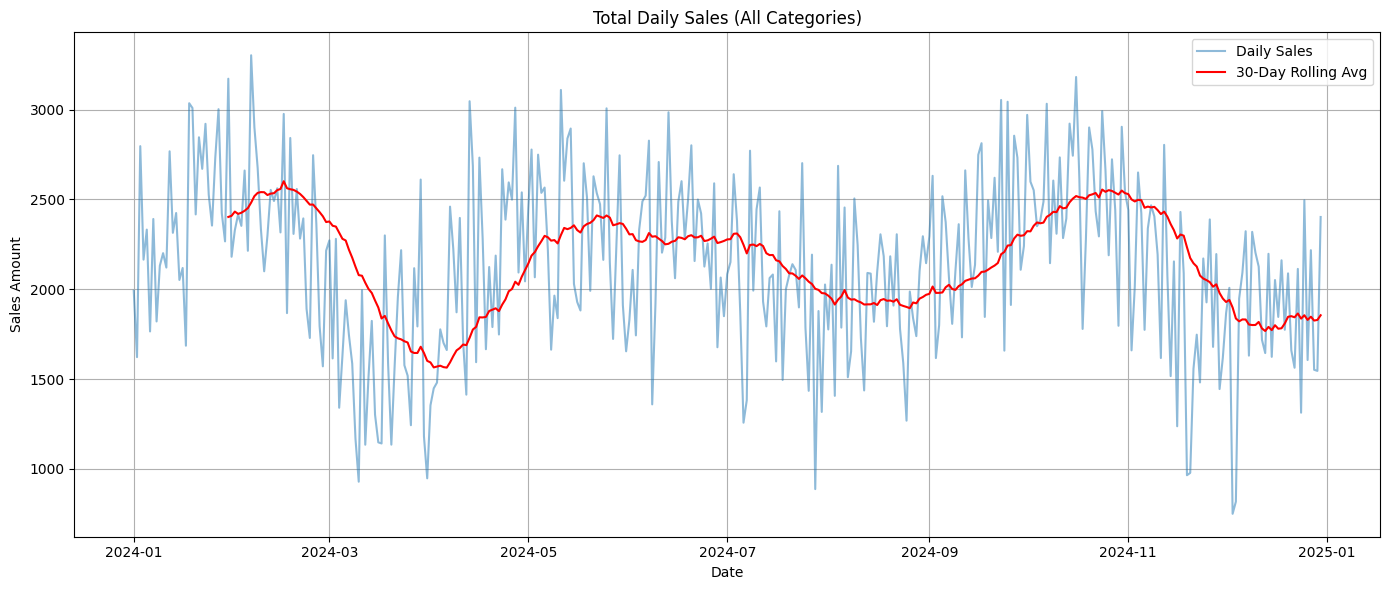

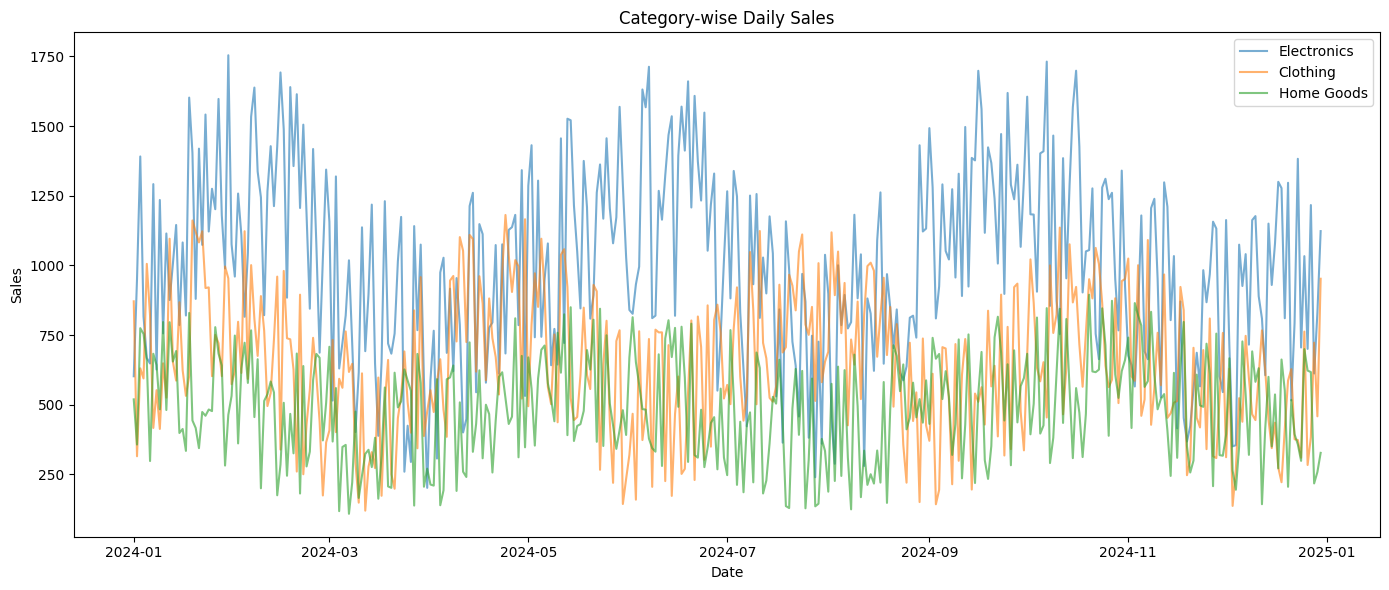

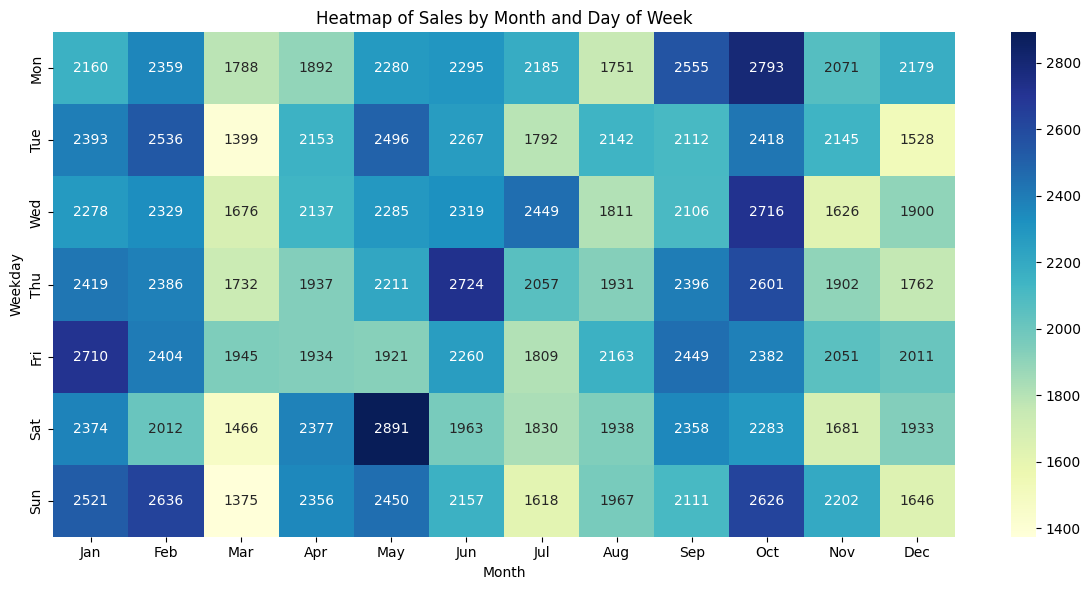

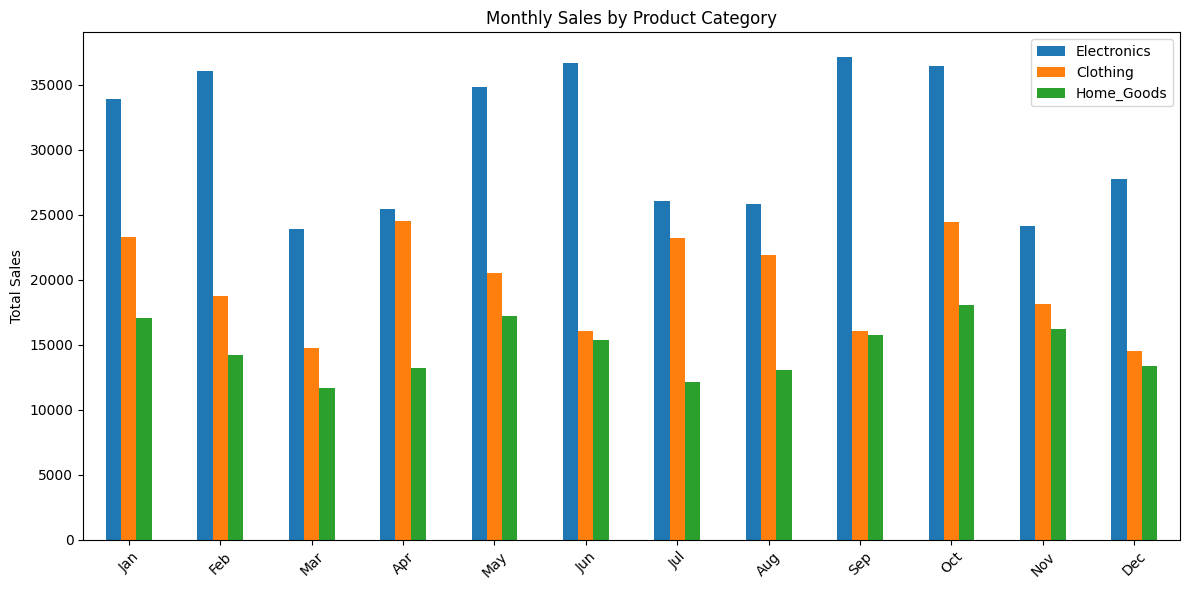

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate 1 year of sales data
np.random.seed(42)
date_range = pd.date_range(start="2024-01-01", periods=365, freq='D')

# Categories: Electronics, Clothing, Home Goods
sales_electronics = np.random.randint(500, 1500, size=365) + 300 * np.sin(np.linspace(0, 6 * np.pi, 365))
sales_clothing = np.random.randint(300, 1000, size=365) + 200 * np.sin(np.linspace(0, 8 * np.pi, 365))
sales_home = np.random.randint(200, 800, size=365) + 100 * np.cos(np.linspace(0, 5 * np.pi, 365))

df_sales = pd.DataFrame({
    'Date': date_range,
    'Electronics': sales_electronics,
    'Clothing': sales_clothing,
    'Home_Goods': sales_home
})

df_sales['Total_Sales'] = df_sales[['Electronics', 'Clothing', 'Home_Goods']].sum(axis=1)
df_sales['Month'] = df_sales['Date'].dt.month
df_sales['Weekday'] = df_sales['Date'].dt.dayofweek

# Rolling average
df_sales['Total_Sales_Rolling'] = df_sales['Total_Sales'].rolling(window=30).mean()

# 📈 Total Sales Over Time
plt.figure(figsize=(14, 6))
plt.plot(df_sales['Date'], df_sales['Total_Sales'], alpha=0.5, label='Daily Sales')
plt.plot(df_sales['Date'], df_sales['Total_Sales_Rolling'], color='red', label='30-Day Rolling Avg')
plt.title('Total Daily Sales (All Categories)')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Category-wise Trends
plt.figure(figsize=(14, 6))
plt.plot(df_sales['Date'], df_sales['Electronics'], label='Electronics', alpha=0.6)
plt.plot(df_sales['Date'], df_sales['Clothing'], label='Clothing', alpha=0.6)
plt.plot(df_sales['Date'], df_sales['Home_Goods'], label='Home Goods', alpha=0.6)
plt.title('Category-wise Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# 📆 Heatmap - Sales by Weekday and Month
pivot = df_sales.pivot_table(values='Total_Sales', index='Weekday', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt='.0f',
            xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Heatmap of Sales by Month and Day of Week')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()

# 🛍️ Monthly Category Sales Trends
monthly_trends = df_sales.groupby('Month')[['Electronics', 'Clothing', 'Home_Goods']].sum()
monthly_trends.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_trends.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Sales by Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()